In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import rand_score
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.decomposition import PCA

In [2]:
# Import data
filename = "spotify_song_features.xlsx"
df = pd.read_excel(filename)

features = df.drop(columns=["genre"])
labels = df["genre"]

## View sample of the data
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark 

Here, we use both Regular K-Means and Bisecting K-Means to cluster our data. Not only that, but we take it a step further by comparing the Rand Scores of Regular K-Means and Bisecting for different numbers of clusters. We do this so that we can get an idea of a good choice for the number of clusters by process of trial and error. We choose to mainly powers of 2 (because that is optimal for the halving of bisecting K-Means) 15 (because that is the number of genres Spotify uses), and some other convenient even numbers to explore the space of possible clusters. Below, we see the performances, according to the Rand Scores, for Regular K-Means and Bisecting K-Means are very close, except for 10 clusters. For 10 clusters, the performance of Bisecting K-Means is worse by 0.02 (which is the greatest discrepancy), and this most likely due to the halving in Bisecting K-Means being particularly inefficient. From this testing alone, there is not yet a clear answer for which clustering algorithm is better for our data.

Number of Clusters = 4
	Regular KMeans Rand Score: 0.6943765398363337
	Bisecting KMeans Rand Score: 0.6833784574628343

Number of Clusters = 8
	Regular KMeans Rand Score: 0.8025743070770024
	Bisecting KMeans Rand Score: 0.7975576401004091

Number of Clusters = 10
	Regular KMeans Rand Score: 0.8256601415482732
	Bisecting KMeans Rand Score: 0.8010042528940743

Number of Clusters = 15
	Regular KMeans Rand Score: 0.8527916587918475
	Bisecting KMeans Rand Score: 0.8568236720104578

Number of Clusters = 16
	Regular KMeans Rand Score: 0.8598339140286096
	Bisecting KMeans Rand Score: 0.8568250242145102

Number of Clusters = 24
	Regular KMeans Rand Score: 0.878574771564682
	Bisecting KMeans Rand Score: 0.8795070771454538

Number of Clusters = 32
	Regular KMeans Rand Score: 0.8901186124339119
	Bisecting KMeans Rand Score: 0.8891307513820196



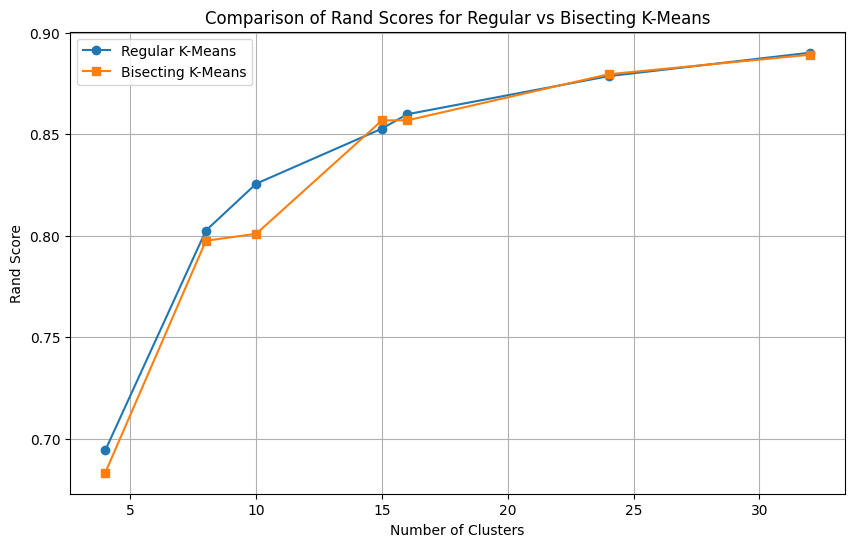

In [3]:
# COMPARING REGULAR K-MEANS AND BISECTING K-MEANS
# Define function to do Clustering
def runClusterAlgorithm(Algorithm, n_clusters_list, data, labels):
    scores = []
    for n_clusters in n_clusters_list:
        algo = Algorithm(n_clusters=n_clusters, random_state=0, n_init=3)
        algo.fit(data)
        predictions = algo.predict(data)
        score = rand_score(labels, predictions)
        scores.append(score)
    return scores

# Run Clustering Algorithm for both regular K-means and Bisecting K-means
n_clusters_list = [4, 8, 10, 15, 16, 24, 32, 64]
kmeans_scores = runClusterAlgorithm(
    KMeans, 
    n_clusters_list,
    features, 
    labels)
bkmeans_scores = runClusterAlgorithm(
    BisectingKMeans, 
    n_clusters_list, 
    features, 
    labels)

# Output the resulting Rand Scores side by side
for i in range(len(n_clusters_list)):
    print("Number of Clusters = " + str(n_clusters_list[i]))
    print("\tRegular KMeans Rand Score: " + str(kmeans_scores[i]))
    print("\tBisecting KMeans Rand Score: " + str(bkmeans_scores[i]))
    print()                         

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_list, kmeans_scores, label='Regular K-Means', marker='o')
plt.plot(n_clusters_list, bkmeans_scores, label='Bisecting K-Means', marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('Rand Score')
plt.title('Comparison of Rand Scores for Regular vs Bisecting K-Means')
plt.legend()
plt.grid(True)
plt.show()

Here, we take our analysis further by combining our Cluster K-Means algorithms with PCA Dimensional Analysis. PCA performs dimensionality reduction on our features, so since we have 13 numerical features, we choose 3 to 12 components for our different iterations of PCA. Then, on top of each of these iterations, we run Regular K-Means and Bisecting K-Means with 15 and 16 clusters. This gives us further insight on how our features represent the data and impact the clustering. We see that when accompanied with PCA dimension reduction, Regular K-Means tends to perform slightly better. However, it is also worth noting that the range of Rand Scores is less than 0.01, so the difference is trivially insignificant. This, although we haven't been able to definitively conclude which clustering method is best, this has still provided us with essential practice in clustering analysis and considerations..

Number of Principal Dimensions = 3
	Regular 15-Cluster KMeans Rand Score: 0.8590947098916609
	Bisecting 15-Cluster KMeans Rand Score: 0.8568236720104578
	Regular 16-Cluster KMeans Rand Score: 0.8605222294747047
	Bisecting 16-Cluster KMeans Rand Score: 0.8568250242145102

Number of Principal Dimensions = 4
	Regular 15-Cluster KMeans Rand Score: 0.859048043206518
	Bisecting 15-Cluster KMeans Rand Score: 0.8568236720104578
	Regular 16-Cluster KMeans Rand Score: 0.8605022772010261
	Bisecting 16-Cluster KMeans Rand Score: 0.8568250242145102

Number of Principal Dimensions = 5
	Regular 15-Cluster KMeans Rand Score: 0.8584108511313188
	Bisecting 15-Cluster KMeans Rand Score: 0.8568236720104578
	Regular 16-Cluster KMeans Rand Score: 0.8603153567825036
	Bisecting 16-Cluster KMeans Rand Score: 0.8568250242145102

Number of Principal Dimensions = 6
	Regular 15-Cluster KMeans Rand Score: 0.8583775902642024
	Bisecting 15-Cluster KMeans Rand Score: 0.8568236720104578
	Regular 16-Cluster KMeans Rand 

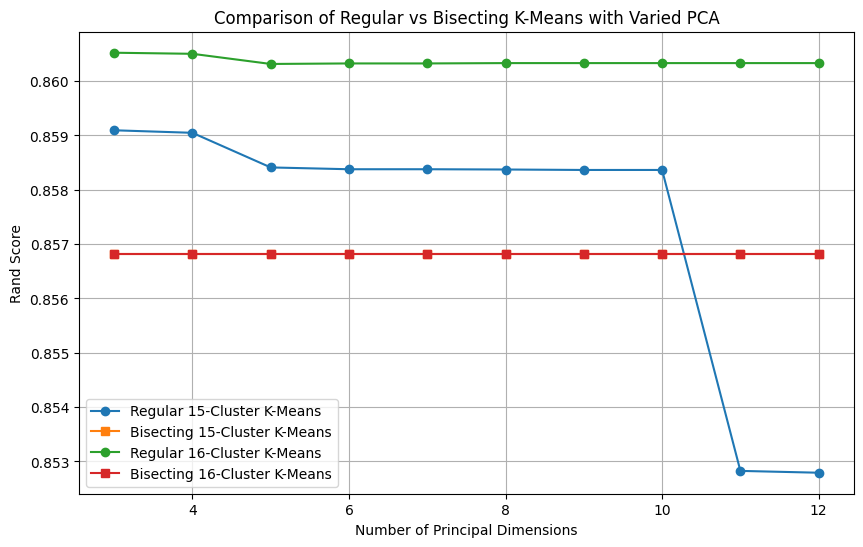

In [5]:
# Now, let's also try the Cluster Algorithms with PCA
reduction_dims = [*range(3, len(features.columns))]
pca_kmeans_scores0 = []
pca_kmeans_scores1 = []
pca_bkmeans_scores0 = []
pca_bkmeans_scores1 = []
for dim in reduction_dims:
    pca = PCA(n_components=dim)
    pca.fit(features)
    pca_features = pca.transform(features)
    # We choose 15 as num clusters bc that's how many genres Spotify actually has
    kmeans_scores = runClusterAlgorithm(
        KMeans, 
        [15, 16],
        pca_features, 
        labels)
    bkmeans_scores = runClusterAlgorithm(
        BisectingKMeans, 
        [15, 16], 
        pca_features, 
        labels)
    pca_kmeans_scores0.append(kmeans_scores[0])
    pca_kmeans_scores1.append(kmeans_scores[1])
    pca_bkmeans_scores0.append(bkmeans_scores[0])
    pca_bkmeans_scores1.append(bkmeans_scores[1])

# Output the resulting Rand Scores side by side
for i in range(len(reduction_dims)):
    print("Number of Principal Dimensions = " + str(reduction_dims[i]))
    print("\tRegular 15-Cluster KMeans Rand Score: " + str(pca_kmeans_scores0[i]))
    print("\tBisecting 15-Cluster KMeans Rand Score: " + str(pca_bkmeans_scores0[i]))
    print("\tRegular 16-Cluster KMeans Rand Score: " + str(pca_kmeans_scores1[i]))
    print("\tBisecting 16-Cluster KMeans Rand Score: " + str(pca_bkmeans_scores1[i]))
    print()  
     
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(reduction_dims, pca_kmeans_scores0, label='Regular 15-Cluster K-Means', marker='o')
plt.plot(reduction_dims, pca_bkmeans_scores0, label='Bisecting 15-Cluster K-Means', marker='s')
plt.plot(reduction_dims, pca_kmeans_scores1, label='Regular 16-Cluster K-Means', marker='o')
plt.plot(reduction_dims, pca_bkmeans_scores1, label='Bisecting 16-Cluster K-Means', marker='s')
plt.xlabel('Number of Principal Dimensions')
plt.ylabel('Rand Score')
plt.title('Comparison of Regular vs Bisecting K-Means with Varied PCA')
plt.legend()
plt.grid(True)
plt.show()   